In [1]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

In [2]:
# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [4]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)
#기사안의 단어 중 거의 사용되지 않는것들도 있음. 모든단어를 다 사용하는것은 비효율적. 빈도가 높은 단어만 불러와 사용
#빈도가 1~1000에 해당하는 단어만 선택해서 불러오는것. 

In [5]:
# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

#딥러닝은 단어를 그대로 사용하지 않고, 숫자로 변환한 다음 학습할 수 있음
#데이터안에서 해당단어가 몇번이나 나타나는지 세어 빈도에 따라 번호를 붙인것임
#예를들어 3이라고 하면 3번째로 빈도가 높은 단어라는 뜻. 
#이작업을 tokenizer()같은 함수를 사용 - 케라스는 이미 이 작업을 마친 데이터임. 


46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

#각 기사의 단어의 수가 각각 다르므로 단어의 숫자를 맞춰야함. 
#전처리 함수 sequence
#입력된 기사의 단어수가 100보다 크면 100개째 단어만 선택하고 나머지는 버림
#모자랄때는?

#이제 y 데이터에 원-핫 인코딩 처리를 하여 데이터 전처리 과정을 마침


In [7]:
# 모델의 설정
#딥러닝의 구조
# Embedding('불러온 단어의 총 개수', '기사당 단어 수') 형식으로 사용하며, 모델 설정 부분의 맨 처음에 있어야 함

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [7]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [8]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 9s 1ms/step - loss: 2.6147 - acc: 0.3442 - val_loss: 2.4222 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 9s 960us/step - loss: 2.3039 - acc: 0.3901 - val_loss: 2.0312 - val_acc: 0.5049
Epoch 3/20
8982/8982 [==============================] - 9s 971us/step - loss: 1.9079 - acc: 0.5145 - val_loss: 1.7706 - val_acc: 0.5512
Epoch 4/20
8982/8982 [==============================] - 9s 955us/step - loss: 1.7391 - acc: 0.5513 - val_loss: 1.7208 - val_acc: 0.5583
Epoch 5/20
8982/8982 [==============================] - 8s 928us/step - loss: 1.6366 - acc: 0.5825 - val_loss: 1.6616 - val_acc: 0.5993
Epoch 6/20
8982/8982 [==============================] - 8s 930us/step - loss: 1.5161 - acc: 0.6187 - val_loss: 1.6444 - val_acc: 0.5793
Epoch 7/20
8982/8982 [==============================] - 8s 946us/step - loss: 1.4520 - acc: 0.6277 - val_loss: 1.5004 - val_acc: 0.6273
Ep

In [9]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 454us/step

 Test Accuracy: 0.7115


In [10]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

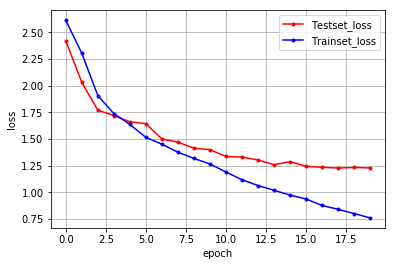

In [11]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()